# Q2.b, Q2.c, Q2.d – Naive Bayes Model Training, Evaluation, and Persistence
The following Jupyter Notebook solves the questions Q2.b, Q2.c and Q2.d of the CA assignment for the CityPulse AI system.

Using the dataset previously extracted from the RDF/XML ontology from Q2.a, and stored in the data/ folder, it trains three Multinomial Naive Bayes classifiers to predict the news category based on three different text inputs:

- Only headlines.
- Only the short descriptions.
- The combination of both headlines and short descriptions.

Each of the models is evaluated using classification accuracy and confusion matrices. Then, only the model with the best performance is selected based on evaluation of the accuracy and saved using pickle, as we will need it later for the Q4.

In [61]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from pathlib import Path

In [62]:
data = pd.read_csv("../data/news_extracted.csv")
# Extracts the target label
y = data['Category']
# Build three text feature sets for model training
X_headlines = data['Headline'].fillna("")
X_descriptions = data['Description'].fillna("")
X_headlines_and_description = (X_headlines + " " + X_descriptions).str.strip()


In [63]:
# Function to vectorize the text data
def vectorize_text(text):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(text)
    return X, vectorizer

# Vectorizes headlines, descriptions, and the combination of both
X_headlines_vec, vec_headlines = vectorize_text(X_headlines)
X_descriptions_vec, vec_descriptions = vectorize_text(X_descriptions)
X_combined_vec, vec_combined = vectorize_text(X_headlines_and_description)

In [64]:
# Function to train and evaluate models (accuracy results + Confusion Matrix)
def train_and_evaluate(X_train, X_test, y_train, y_test, title):
    model = MultinomialNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"{title} model accuracy: {acc * 100:.2f}%")
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, xticks_rotation=45
    )

    return model, acc

Headlines model accuracy: 67.33%


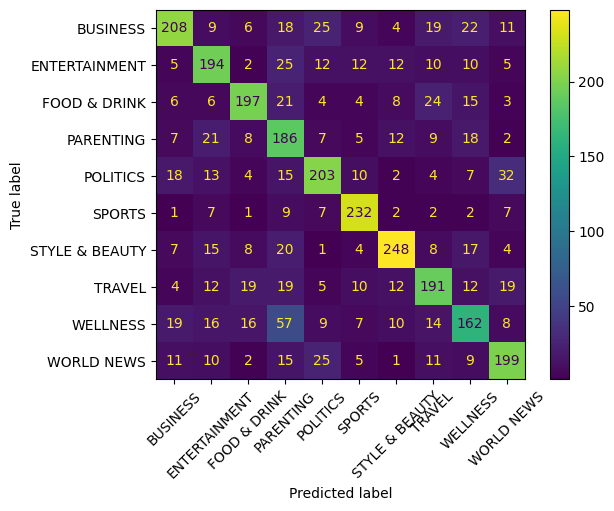

In [65]:
# Train/test split for headlines
X_headlines_train, X_headlines_test, y_headlines_train, y_headlines_test = train_test_split(
    X_headlines_vec,
    y,
    test_size=0.3,
    random_state=42
)

# Train and evaluate the headlines-only model
nb_headlines, acc_headlines = train_and_evaluate(
    X_headlines_train, X_headlines_test,
    y_headlines_train, y_headlines_test,
    "Headlines"
)

Descriptions model accuracy: 57.27%


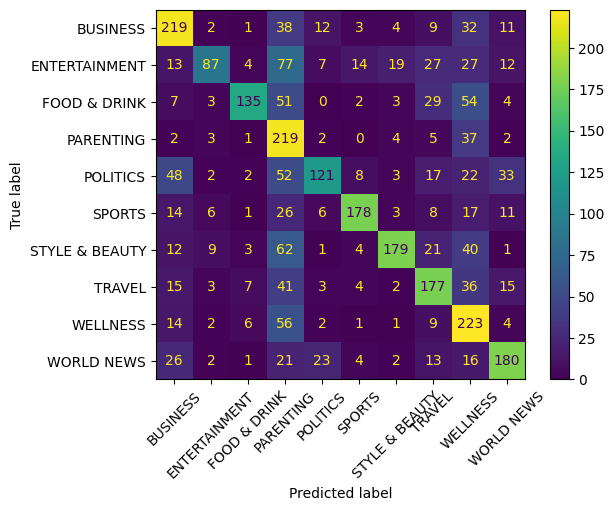

In [66]:
# Train/test split for descriptions
X_desc_train, X_desc_test, y_desc_train, y_desc_test = train_test_split(
    X_descriptions_vec,
    y,
    test_size=0.3,
    random_state=42
)

# Train and evaluate the descriptions-only model
nb_descriptions, acc_descriptions = train_and_evaluate(
    X_desc_train, X_desc_test,
    y_desc_train, y_desc_test,
    "Descriptions"
)

Combined model accuracy: 73.87%


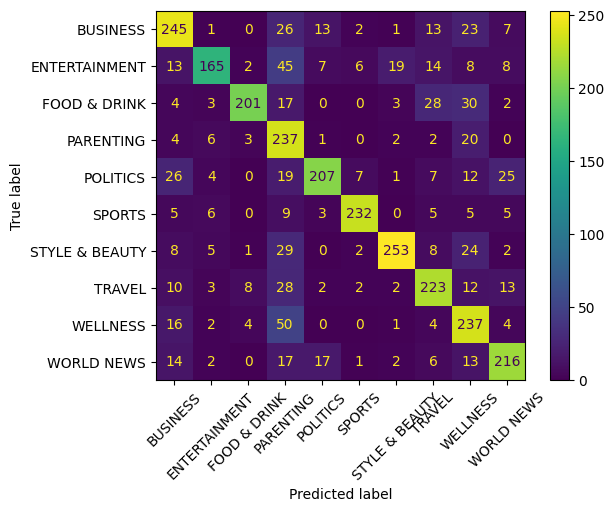

In [67]:
# Train/test split for combined headlines + descriptions
X_comb_train, X_comb_test, y_comb_train, y_comb_test = train_test_split(
    X_combined_vec,
    y,
    test_size=0.3,
    random_state=42
)

# Train and evaluate the combined-text model
nb_combined, acc_combined = train_and_evaluate(
    X_comb_train, X_comb_test,
    y_comb_train, y_comb_test,
    "Combined"
)

In [68]:
# Save a trained Naive Bayes model and the vectorizer using pickle
def save_model_and_vectorizer(model, vectorizer, model_path, vectorizer_path):
    # Make sure the target directory exists
    Path(model_path).parent.mkdir(exist_ok=True)
    # Serialize and save the trained model
    with open(model_path, "wb") as f:
        pickle.dump(model, f)
    # Serialize and save the vectorizer
    with open(vectorizer_path, "wb") as f:
        pickle.dump(vectorizer, f)


In [69]:
# Stores each of the models, vectorizers and their accuracy into a list
results = [
    {"name": "Headlines",    "model": nb_headlines,    "vectorizer": vec_headlines,    "accuracy": acc_headlines},
    {"name": "Descriptions", "model": nb_descriptions, "vectorizer": vec_descriptions, "accuracy": acc_descriptions},
    {"name": "Combined",     "model": nb_combined,     "vectorizer": vec_combined,     "accuracy": acc_combined},
]

# Prints accuracy of the models for clarity
print("\nSummary of accuracies:")
print(f"Headlines:     {acc_headlines * 100:.2f}%")
print(f"Descriptions:  {acc_descriptions * 100:.2f}%")
print(f"Combined:      {acc_combined * 100:.2f}%")

# Selects the model with best performance based on evaluation of the accuracy
best = max(results, key=lambda r: r["accuracy"])
print(f"Selected best model: {best['name']} ({best['accuracy'] * 100:.2f}%)")

save_model_and_vectorizer(
    best["model"],
    best["vectorizer"],
    "../models/best_nb_model.pkl",
    "../models/best_nb_vectorizer.pkl"
)



Summary of accuracies:
Headlines:     67.33%
Descriptions:  57.27%
Combined:      73.87%
Selected best model: Combined (73.87%)
